### Bag of Words

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

### kmeans.py

[2 0 1 1 0 1 0 2 0 1 2 1 1 0 0 0 0 1 0 2 0 0 1 0 2 2 2 2 0 0 0 2 2 2 0 0 2
 0 1 2 1 0 2 1 0 2 0 2 0 1 2 2 2 2 2 2 1 1 2 1 0 2 2 2 2 2 2 2 0 2 0 1 0 0
 1 1 1 2 0 0 1 1 2 0 0 0 1 0 0 2 0 0 0 1 1 1 1 2 0 2 0 1 2 2 2 1 2 2 1 1 2
 1 2 1 1 2 0 0 1 0 2 1 1 0 0 2 0 0 1 2 1 0 0 2 2 0 2 2 2 0 1 0 0 1 1 2 0 2
 2 1 0 2 2 2 1 0 2 0 0 1 1 2 2 1 0 2 0 0 1 0 2 0 1 1 0 2 1 1 1 1 1 1 1 0 0
 0 2 1 2 0 1 1 2 2 1 0 2 0 1 2 2 2 0 1 2 2 0 2 1 0 1 0 1 2 1 1 0 1 0 0 0 1
 1 1 1 2 0 0 2 2 1 1 1 1 2 2 2 2 2 2 1 1 0 0 1 0 0 2 0 2 2 2 1 0 0 1 1 1 0
 0 1 1 2 1 1 1 1 0 0 1 2 1 1 0 1 1 2 0 1 0 1 2 1 2 2 2 1 1 2 2 2 1 2 2 0 2
 2 2 0 0 2 2 1 2 2 2 0 1 2 1 0 2 0 0 0 0 2 2 2 2 1 1 1 1 2 1 2 2 1 1 0 1 1
 2 1 1 2 1 0 2 0 0 0 0 0 0 2 2 1 1 2 1 2 0 2 1 1 2 2 1 2 2 0 1 2 2 2 1 0 2
 2 1 0 0 0 1 1 1 1 2 2 2 2 2 1 1 2 0 2 0 0 2 0 0 0 0 0 2 2 0 1 1 0 1 0 2 1
 0 2 0 0 1 1 2 0 1 1 0 2 0 2 0 0 2 0 0 1 0 2 1 1 0 2 0 1 2 2 2 0 2 2 2 2 1
 0 0 0 2 0 1 1 1 1 2 2 2 1 2 2 2 0 1 0 0 2 0 1 0 1 2 0 0 0 1 1 2 0 2 2 2 2
 1 2 0 0 0 0 2 2 0 0 0 1 

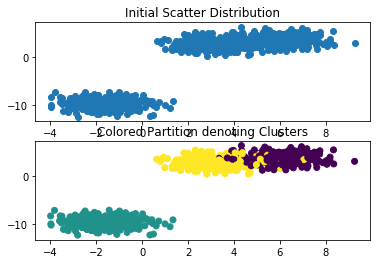

In [35]:
"""
Using SKLearns API for performing Kmeans clustering.
Using sklearn.datasets.make_blobs for generating randomized gaussians
for clustering.

"""

import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

# create a dataset sample space that will be used
# to test KMeans. Use function : make_blobs
# 

n_samples = 1000
n_features = 5;
n_clusters = 3;

# aint this sweet 
X, y = make_blobs(n_samples, n_features) 
# X => array of shape [nsamples,nfeatures] ;;; y => array of shape[nsamples]

# X : generated samples, y : integer labels for cluster membership of each sample
# 
# 

# performing KMeans clustering

ret =  KMeans(n_clusters = n_clusters).fit_predict(X)
print(ret)

__, ax = plt.subplots(2)
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title("Initial Scatter Distribution")
ax[1].scatter(X[:,0], X[:,1], c=ret)
ax[1].set_title("Colored Partition denoting Clusters")
# plt.scatter
plt.show()



### Bag.py

In [36]:
import cv2
import numpy as np 
from glob import glob 
import argparse
#from helpers import *
from matplotlib import pyplot as plt 


class BOV:
    def __init__(self, no_clusters):
        self.no_clusters = no_clusters
        self.train_path = None
        self.test_path = None
        self.im_helper = ImageHelpers()
        self.bov_helper = BOVHelpers(no_clusters)
        self.file_helper = FileHelpers()
        self.imageCount = 0
        self.trainImageCount = 0
        self.train_labels = np.array([])
        self.name_dict = {}
        self.descriptor_list = []
        
        self.path = None
        self.gray = 0
        
        self.train_images = []
        self.train_img_names = []
        self.train_cls = []
        
        self.test_images = []
        self.test_img_names = []
        self.test_cls = []      

        
    def dictionaryfy(self):
        train_dict = {}
        for i, image in enumerate(self.train_images):        
            cls = str(self.train_cls[i]).split('_')[0]
            if (cls not in train_dict):
                train_dict[cls] = []

            train_dict[cls].append(image)
        self.images = train_dict
        
        test_dict = {}
        for i, image in enumerate(self.test_images):        
            cls = str(self.test_cls[i]).split('_')[0]
            if (cls not in test_dict):
                test_dict[cls] = []

            test_dict[cls].append(image)
        self.testImages = test_dict
        
     
    def extractFeatures(self):
        # extract SIFT Features from each image
        print("train image count: ", self.trainImageCount)
        label_count = 0 
        for word, imlist in self.images.items():
            self.name_dict[str(label_count)] = word
            print("Computing Features for ", word)
            #print("List: ", imlist)
            for im in imlist:
                # cv2.imshow("im", im)
                # cv2.waitKey()
                self.train_labels = np.append(self.train_labels, label_count)
                #plt.figure()
                #plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
                
                kp, des = self.im_helper.features(im) #self.im_helper.gray(im)
                #featureV = self.im_helper.featuresPL(im)
                #print("featureV: ", featureV)
                #print("des: ", des)
                
                
                
                self.descriptor_list.append(des)

            label_count += 1
            
        #print(self.descriptor_list)
    
    def trainModel(self):
        """
        This method contains the entire module 
        required for training the bag of visual words model

        Use of helper functions will be extensive.

        """
        # perform clustering   
        bov_descriptor_stack = self.bov_helper.formatND(self.descriptor_list)
        print("Cluster")
        self.bov_helper.cluster()
        self.bov_helper.developVocabulary(n_images = self.trainImageCount, descriptor_list=self.descriptor_list)

        # show vocabulary trained
        self.bov_helper.plotHist()
 

        self.bov_helper.standardize()
        self.runCrossval()
        print("trainModel DONE.")

    def runCrossval(self):
        self.bov_helper.train(self.train_labels)
        
    def recognize(self,test_img, test_image_path=None):

        """ 
        This method recognizes a single image 
        It can be utilized individually as well.


        """

        kp, des = self.im_helper.features(test_img)
        #des = self.im_helper.featuresPL(im)
        # print kp
        print(des.shape)

        # generate vocab for test image
        vocab = np.array( [[ 0 for i in range(self.no_clusters)]])
        # locate nearest clusters for each of 
        # the visual word (feature) present in the image
        
        # test_ret =<> return of kmeans nearest clusters for N features
        test_ret = self.bov_helper.kmeans_obj.predict(des)
        # print test_ret

        # print vocab
        for each in test_ret:
            vocab[0][each] += 1

        print(vocab)
        # Scale the features
        vocab = self.bov_helper.scale.transform(vocab)

        # predict the class of the image
        lb = self.bov_helper.clf.predict(vocab)
        # print "Image belongs to class : ", self.name_dict[str(int(lb[0]))]
        return lb


    def getHistogramLabels(self):
        return self.bov_helper.getHistogramLabels()
        
    def testModel(self):
        """ 
        This method is to test the trained classifier

        read all images from testing path 
        use BOVHelpers.predict() function to obtain classes of each image

        """
        
        #self.testImages, self.testImageCount = self.file_helper.getFiles(self.test_path)

        predictions = []

        for word, imlist in self.testImages.items():
            print("processing " ,word)
            for im in imlist:
                # print imlist[0].shape, imlist[1].shape
                print(im.shape)
                cl = self.recognize(im)
                print(cl)
                predictions.append({
                    'image':im,
                    'class':cl,
                    'object_name':self.name_dict[str(int(cl[0]))]
                    })

        print(predictions)
        for each in predictions:
            # cv2.imshow(each['object_name'], each['image'])
            # cv2.waitKey()
            # cv2.destroyWindow(each['object_name'])
            # 
            #if (self.gray):
            #    plt.imshow(cv2.cvtColor(each['image'], cv2.COLOR_GRAY2RGB))
            #else: 
            #    plt.imshow(cv2.cvtColor(each['image'], cv2.COLOR_BGR2RGB))
            plt.imshow(Image.fromarray(each['image']))
            plt.title(each['object_name'])
            plt.show()


    def print_vars(self):
        pass
    
    def loadFruits(self, path):
        self.path = path
        
        # read file. prepare file lists.
        self.train_images, self.train_img_names = self.file_helper.get_fruit_images(self.path)
        self.train_cls = [name.split('_')[0] for name in self.train_img_names]
        
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()
    
    def trainTestSplit(self):
        self.train_images, self.test_images, self.train_cls, self.test_cls = train_test_split(self.train_images, self.train_cls, test_size=0.2, random_state=9253, stratify=self.train_cls)
        self.trainImageCount = len(self.train_images)
        self.testImageCount = len(self.test_images)
    
    def loadCars(self, path):
        self.path = path
        
        self.train_images, self.train_img_names = self.file_helper.get_car_images(self.path)
        self.train_cls = [0 if name.startswith('neg') else 1 for name in self.train_img_names]
        self.trainImageCount = len(self.train_images)
        
        
        self.test_images, self.test_img_names = self.file_helper.get_car_images(self.path, 'TestImages')
        self.test_cls = [0 if name.startswith('neg') else 1 for name in self.test_img_names]
        self.testImageCount = len(self.test_images)
        
        # set testing paths
        #self.test_path = test_path
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()    

# if __name__ == '__main__':

#     # parse cmd args
#     parser = argparse.ArgumentParser(
#             description=" Bag of visual words example"
#         )
#     parser.add_argument('--train_path', action="store", dest="train_path", required=True)
#     parser.add_argument('--test_path', action="store", dest="test_path", required=True)

#     args =  vars(parser.parse_args())
#     print(args)

    
#     bov = BOV(no_clusters=100)

#     # set training paths
#     bov.train_path = args['train_path'] 
#     # set testing paths
#     bov.test_path = args['test_path'] 
#     # train the model
#     bov.trainModel()
#     # test model
#     bov.testModel()


### helper.py

In [37]:
import numpy as np 

from PIL import Image
import cv2

import requests
import zipfile
import tarfile
import io

import os
import glob

import gc

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

class ImageHelpers:
    def __init__(self):
        self.sift_object = cv2.xfeatures2d.SIFT_create()

    def gray(self, image):
        plt.figure()
        plt.imshow(image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray

    def colorRGB(self, image):
        colorRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return colorRGB
    
    def features(self, image):
        keypoints, descriptors = self.sift_object.detectAndCompute(image, None)
        return [keypoints, descriptors]
    
    def featuresPL(self, image):
        im = Image.fromarray(image)
        featureVector = im.histogram()
        return featureVector


class BOVHelpers:
    def __init__(self, n_clusters = 20):
        self.n_clusters = n_clusters
        self.kmeans_obj = KMeans(n_clusters = n_clusters)
        self.kmeans_ret = None
        self.descriptor_vstack = None
        self.mega_histogram = None
        self.train_labels = None
        self.clf  = SVC()    
    def getHistogramLabels(self):
        return [self.mega_histogram,self.train_labels]
    
    def cluster(self):
        """    
        cluster using KMeans algorithm, 

        """
        self.kmeans_ret = self.kmeans_obj.fit_predict(self.descriptor_vstack)

    def developVocabulary(self,n_images, descriptor_list, kmeans_ret = None):
        
        """
        Each cluster denotes a particular visual word 
        Every image can be represeted as a combination of multiple 
        visual words. The best method is to generate a sparse histogram
        that contains the frequency of occurence of each visual word 

        Thus the vocabulary comprises of a set of histograms of encompassing
        all descriptions for all images

        """

        self.mega_histogram = np.array([np.zeros(self.n_clusters) for i in range(n_images)])
        old_count = 0
        print("n_images:",n_images)
        print("descriptor_list length:", len(descriptor_list))
        
        for i in range(n_images):
            #print(i)
            l = len(descriptor_list[i])
            for j in range(l): 
                #print(i, j)
                if kmeans_ret is None:
                    #if (old_count+j==n_images):
                    #    print(old_count+j)
                    #    break;
                    #else: 
                    idx = self.kmeans_ret[old_count+j]
                else:
                    idx = kmeans_ret[old_count+j]
                #print("why are we still here")
                self.mega_histogram[i][idx] += 1
            old_count += l
        print("Vocabulary Histogram Generated")

    def standardize(self, std=None):
        """
        
        standardize is required to normalize the distribution
        wrt sample size and features. If not normalized, the classifier may become
        biased due to steep variances.

        """
        if std is None:
            self.scale = StandardScaler().fit(self.mega_histogram)
            self.mega_histogram = self.scale.transform(self.mega_histogram)
        else:
            print("STD not none. External STD supplied")
            self.mega_histogram = std.transform(self.mega_histogram)

    def formatND(self, l):
        """    
        restructures list into vstack array of shape
        M samples x N features for sklearn

        """
        #print("l: ")
        #print(l)
        
        vStack = np.array(l[0])
        for remaining in l[1:]:
            vStack = np.vstack((vStack, remaining))
        self.descriptor_vstack = vStack.copy()
        return vStack

    def train(self, train_labels):
        """
        uses sklearn.svm.SVC classifier (SVM) 


        """
        #print("Training SVM")
        #print(self.clf)
        #print("Train labels", train_labels)
        #self.clf.fit(self.mega_histogram, train_labels)
        self.train_labels=train_labels
        self.clf.fit(self.mega_histogram, train_labels)
        names = ["Nearest Centroid", "Linear SVM","Decision Tree", "Naive Bayes","MLP"]
        classifiers = [NearestCentroid(metric="euclidean"),LinearSVC(dual=False),DecisionTreeClassifier(),GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)]
        
        for name, clf in zip(names, classifiers):
            scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
            scores = cross_validate(clf, self.mega_histogram, train_labels, cv=5, scoring=scoring,return_train_score=True)
            print(name," -- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
            print(name," -- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
            print(name," -- Training Set --", "Mean Precision", scores['train_prec'].mean())
            print(name," -- Test Set --", "Mean Precision", scores['test_prec'].mean())
            print(name," -- Training Set --", "Mean Recall", scores['train_rec'].mean())
            print(name," -- Test Set --", "Mean Recall", scores['test_rec'].mean())
        print("Training completed")

    def predict(self, iplist):
        predictions = self.clf.predict(iplist)
        return predictions

    def plotHist(self, vocabulary = None):
        print("Plotting histogram")
        if vocabulary is None:
            vocabulary = self.mega_histogram

        x_scalar = np.arange(self.n_clusters)
        y_scalar = np.array([abs(np.sum(vocabulary[:,h], dtype=np.int32)) for h in range(self.n_clusters)])

        print(y_scalar)

        plt.bar(x_scalar, y_scalar)
        plt.xlabel("Visual Word Index")
        plt.ylabel("Frequency")
        plt.title("Complete Vocabulary Generated")
        plt.xticks(x_scalar + 0.4, x_scalar)
        plt.show()

class FileHelpers:

    def __init__(self):
        pass
    
    def resize_images(self,images):
        """
        used to resize all images to the mean height/width
        note that this is prone to generating distorted images
        better results are expected with methods like pyramid pooling (https://arxiv.org/abs/1406.4729)
        """
        target_size = 200
        mean_shape = np.mean([[i.shape[0],i.shape[1]] for i in images], axis=0)
        max_v = max(mean_shape[0], mean_shape[1])
        # scale by preserving average ratio
        target_height = int(target_size * mean_shape[0]/max_v)
        target_width = int(target_size * mean_shape[1]/max_v)
        for i in range(len(images)):
            images[i] = np.array(Image.fromarray(images[i]).resize((target_width, target_height), Image.ANTIALIAS))
            print("Resized {} fruit images".format(i), end="\r")

        return images
    
    def get_car_images(self, car_data_path, folder = 'TrainImages'):
        print(car_data_path, folder)
        p = os.path.join(car_data_path,folder,'*.pgm')
        files = glob.glob(p)
        print("Found {} car files".format(len(files)))
        images = []
        image_names = []

        for filename in files:
            image_names.append(os.path.basename(filename))
            with Image.open(filename) as img:
                images.append(np.array(img))

        return np.array(images), image_names

    def get_fruit_images(self, fruits_data_path):
        images = []
        image_names = []
        cnt=0

        for dirpath, dirnames, filenames in os.walk(fruits_data_path):
            for filename in [f for f in filenames if f.endswith(".jpg")]:
                cnt = cnt+1
                with Image.open(os.path.join(dirpath,filename)) as img:
                    if img.format != "JPEG":
                        # we only want 3 channels
                        img = img.convert("RGB")
                    np_img = np.array(img)
                    if len(np_img.shape) != 3 or np_img.shape[2] != 3:
                        # incorrectly imported/converted RGB file
                        continue
                    images.append(np_img)
                    image_names.append(os.path.split(dirpath)[-1] + "_" + filename)
                    print("Found {} fruit files".format(len(image_names)), end="\r")
        
        
        images = np.stack(self.resize_images(images), axis=0)

        return images, image_names
    
    def getFiles(self, path):
        """
        - returns  a dictionary of all files 
        having key => value as  objectname => image path

        - returns total number of files.

        """
        imlist = {}
        count = 0
        for each in glob(path + "*"):
            each = each.replace("\\", "/")
            word = each.split("/")[-1]
            print(" #### Reading image category ", word, " ##### ")
            imlist[word] = []
            for imagefile in glob(path+word+"/*"):
                imagefile = imagefile.replace("\\", "/")
                print("Reading file ", imagefile)
                
                
                im = Image.open(imagefile)
                if (im.format != "JPEG"):
                    im = im.convert("RGB")
                np_im = np.array(im)
                if len(np_im.shape) != 3 or np_im.shape[2] != 3:
                    # incorrectly imported/converted RGB file
                    continue
                
                #im = cv2.imread(imagefile,1)
                
                #plt.imshow(im)
                imlist[word].append(np_im)
                count +=1 

        return [imlist, count]



### Load images

In [38]:
cars = BOV(no_clusters=100)
cars.loadCars("../../../ex3/CarData/")
fruits = BOV(no_clusters=100)
fruits.loadFruits("../../ex3/FIDS30/")

../../../ex3/CarData/ TrainImages
Found 0 car files
../../../ex3/CarData/ TestImages
Found 0 car files


Text(0.5, 1.0, 'Colour Histogram, using PIL')

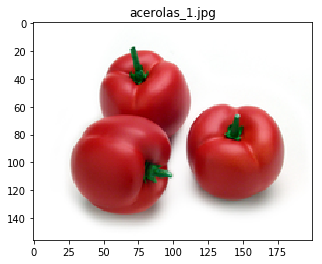

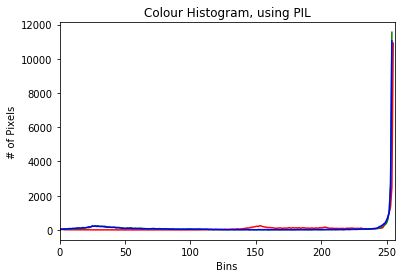

In [39]:
im = Image.fromarray(fruits.train_images[0])
plt.imshow(im)
plt.title(fruits.train_img_names[0])

featureVector = im.histogram()

plt.figure()
plt.plot(featureVector[:256], 'r')
plt.plot(featureVector[257:512], 'g')
plt.plot(featureVector[513:], 'b')
plt.xlim([0, 256])
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.title("Colour Histogram, using PIL")

### Train/test split

In [40]:
print("{} unique classes for cars".format(len(set(cars.train_cls))))
print("{} unique classes for fruits".format(len(set(fruits.train_cls))))

fruits.trainTestSplit()

0 unique classes for cars
30 unique classes for fruits


Text(0.5, 1.0, 'watermelons')

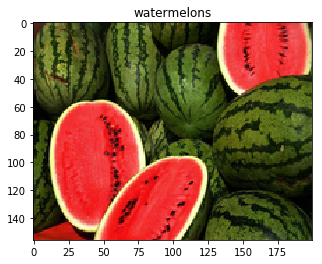

In [41]:
cars.dictionaryfy()
fruits.dictionaryfy()
im = Image.fromarray(fruits.images['watermelons'][0])
plt.imshow(im)
plt.title('watermelons')

In [42]:
%time cars.extractFeatures()
#cars.testModel()

train image count:  0
Wall time: 0 ns


In [43]:
#%time cars.trainModel()
# perform clustering   
#%time bov_descriptor_stack = cars.bov_helper.formatND(cars.descriptor_list)
#%time cars.bov_helper.cluster()
#%time cars.bov_helper.developVocabulary(n_images = cars.trainImageCount, descriptor_list=cars.descriptor_list)

# show vocabulary trained
#%time cars.bov_helper.plotHist()


#%time cars.bov_helper.standardize()
#%time cars.bov_helper.train(cars.train_labels)
#print("trainModel DONE.")


In [44]:
for i,l in enumerate(cars.descriptor_list):
    print(i)
    if (l is None):
        print(i)
        print(l)

In [45]:
%time fruits.extractFeatures()

train image count:  774
Computing Features for  pomegranates
Computing Features for  mangos
Computing Features for  apples
Computing Features for  cherries
Computing Features for  cantaloupes
Computing Features for  olives
Computing Features for  grapes
Computing Features for  peaches
Computing Features for  passionfruit
Computing Features for  tomatoes
Computing Features for  guava
Computing Features for  pineapples
Computing Features for  strawberries
Computing Features for  oranges
Computing Features for  bananas
Computing Features for  watermelons
Computing Features for  blueberries
Computing Features for  avocados
Computing Features for  limes
Computing Features for  acerolas
Computing Features for  grapefruits
Computing Features for  coconuts
Computing Features for  apricots
Computing Features for  raspberries
Computing Features for  figs
Computing Features for  kiwifruit
Computing Features for  blackberries
Computing Features for  pears
Computing Features for  plums
Computing Fe

Cluster
n_images: 774
descriptor_list length: 774
Vocabulary Histogram Generated
Plotting histogram
[1395 1278 1484 1071 2450 1486 1268 1578 1204 2793 1820 2041 1390 1789
 1277 1403 1383 1550 2319 1922 1121 1843 1693 1249 2239 1714 1970 1464
 1855 1204 1731 1421 1323 1293 1438 1591 1349 1559 1328 1370 1995 1459
 1706 1438 1566 1387 1546 1363 1410 1674 1568 1621 1401 1807 1832 1458
 1374 1502 1460 1016 1467 1459 1585 1744 1651 1320 1705 1180 1648 1388
 1589 1287 1459 1360 1275 1388 1296 1294 1450 1525 1345 2306 1472 1486
 1207 1502 1619 1403 1150 1572 1582 1313 1194 1621 1292 1484 1509 1612
 1719 1087]


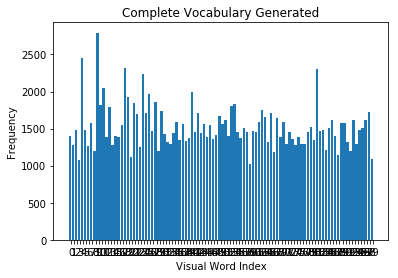

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Nearest Centroid  -- Training Set -- Mean Accuracy 0.4310179230699437
Nearest Centroid  -- Test Set -- Mean Accuracy 0.3018457419827244
Nearest Centroid  -- Training Set -- Mean Precision 0.48324478303595475
Nearest Centroid  -- Test Set -- Mean Precision 0.3525201397043502
Nearest Centroid  -- Training Set -- Mean Recall 0.4325642610964633
Nearest Centroid  -- Test Set -- Mean Recall 0.29876190476190473
Linear SVM  -- Training Set -- Mean Accuracy 0.9867314014817129
Linear SVM  -- Test Set -- Mean Accuracy 0.2613334943250317
Linear SVM  -- Training Set -- Mean Precision 0.9885275206735875
Linear SVM  -- Test Set -- Mean Precision 0.2769057794057794
Linear SVM  -- Training Set -- Mean Recall 0.987118195711662
Linear SVM  -- Test Set -- Mean Recall 0.25391269841269837
Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.18183895442743048
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.183478

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes  -- Training Set -- Mean Accuracy 0.4908604489666598
Naive Bayes  -- Test Set -- Mean Accuracy 0.27905738414459275
Naive Bayes  -- Training Set -- Mean Precision 0.5563556242469117
Naive Bayes  -- Test Set -- Mean Precision 0.27827271866064973
Naive Bayes  -- Training Set -- Mean Recall 0.49376183510549365
Naive Bayes  -- Test Set -- Mean Recall 0.2702380952380952


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

MLP  -- Training Set -- Mean Accuracy 0.17369713514716345
MLP  -- Test Set -- Mean Accuracy 0.0818016082466029
MLP  -- Training Set -- Mean Precision 0.08887263815158718
MLP  -- Test Set -- Mean Precision 0.043841236086850116
MLP  -- Training Set -- Mean Recall 0.1456843647915957
MLP  -- Test Set -- Mean Recall 0.06896031746031746
Training completed
trainModel DONE.
Wall time: 17min 47s


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
%time fruits.trainModel()

In [47]:
#%time fruits.runCrossval()
histogramLabels = fruits.getHistogramLabels()
names = ["Nearest Centroid", "Linear SVM","Decision Tree", "Naive Bayes","MLP"]
classifiers = [NearestCentroid(metric="euclidean"),LinearSVC(dual=False),DecisionTreeClassifier(),GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)]
        
for name, clf in zip(names, classifiers):
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5, scoring=scoring,return_train_score=True)
    print(name," -- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print(name," -- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print(name," -- Training Set --", "Mean Precision", scores['train_prec'].mean())
    print(name," -- Test Set --", "Mean Precision", scores['test_prec'].mean())
    print(name," -- Training Set --", "Mean Recall", scores['train_rec'].mean())
    print(name," -- Test Set --", "Mean Recall", scores['test_rec'].mean())
print("Training completed")

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Nearest Centroid  -- Training Set -- Mean Accuracy 0.4310179230699437
Nearest Centroid  -- Test Set -- Mean Accuracy 0.3018457419827244
Nearest Centroid  -- Training Set -- Mean Precision 0.48324478303595475
Nearest Centroid  -- Test Set -- Mean Precision 0.3525201397043502
Nearest Centroid  -- Training Set -- Mean Recall 0.4325642610964633
Nearest Centroid  -- Test Set -- Mean Recall 0.29876190476190473
Linear SVM  -- Training Set -- Mean Accuracy 0.9867314014817129
Linear SVM  -- Test Set -- Mean Accuracy 0.2613334943250317
Linear SVM  -- Training Set -- Mean Precision 0.9885275206735875
Linear SVM  -- Test Set -- Mean Precision 0.2769057794057794
Linear SVM  -- Training Set -- Mean Recall 0.987118195711662
Linear SVM  -- Test Set -- Mean Recall 0.25391269841269837
Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.1916632480399228
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.1885747

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Naive Bayes  -- Training Set -- Mean Accuracy 0.4908604489666598
Naive Bayes  -- Test Set -- Mean Accuracy 0.27905738414459275
Naive Bayes  -- Training Set -- Mean Precision 0.5563556242469117
Naive Bayes  -- Test Set -- Mean Precision 0.27827271866064973
Naive Bayes  -- Training Set -- Mean Recall 0.49376183510549365
Naive Bayes  -- Test Set -- Mean Recall 0.2702380952380952


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

MLP  -- Training Set -- Mean Accuracy 0.17369713514716345
MLP  -- Test Set -- Mean Accuracy 0.0818016082466029
MLP  -- Training Set -- Mean Precision 0.08887263815158718
MLP  -- Test Set -- Mean Precision 0.043841236086850116
MLP  -- Training Set -- Mean Recall 0.1456843647915957
MLP  -- Test Set -- Mean Recall 0.06896031746031746
Training completed


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


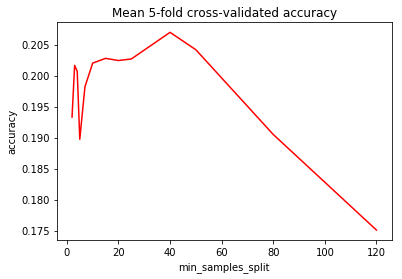

In [53]:
min_samples_splits = [2,3,4,5,7,10,15,20,25,40,50,80,120]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

0 --- 1e-05
[0.31868132 0.22093023 0.23255814 0.26506024 0.27160494 0.28571429
 0.31944444 0.33333333 0.25757576 0.23809524]
1 --- 0.0001
[0.35164835 0.30232558 0.29069767 0.31325301 0.2962963  0.38961039
 0.31944444 0.37681159 0.31818182 0.31746032]
2 --- 0.001
[0.42857143 0.3372093  0.39534884 0.40963855 0.39506173 0.37662338
 0.44444444 0.46376812 0.36363636 0.33333333]
3 --- 0.01
[0.41758242 0.34883721 0.34883721 0.43373494 0.35802469 0.27272727
 0.40277778 0.39130435 0.31818182 0.25396825]
4 --- 0.1
[0.37362637 0.36046512 0.3372093  0.42168675 0.25925926 0.31168831
 0.31944444 0.39130435 0.31818182 0.19047619]
5 --- 1
[0.2967033  0.22093023 0.22093023 0.3373494  0.2345679  0.23376623
 0.20833333 0.34782609 0.27272727 0.20634921]
6 --- 10
[0.25274725 0.20930233 0.18604651 0.30120482 0.20987654 0.19480519
 0.19444444 0.23188406 0.22727273 0.17460317]
7 --- 100


D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

[0.1978022  0.20930233 0.1627907  0.28915663 0.22222222 0.18181818
 0.18055556 0.2173913  0.1969697  0.15873016]
8 --- 1000


D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

[0.1978022  0.20930233 0.1627907  0.28915663 0.22222222 0.19480519
 0.16666667 0.2173913  0.1969697  0.15873016]


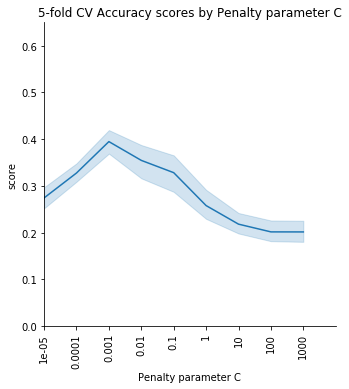

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import pandas as pd

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
results = []
for idx, c in enumerate(C):
    print(idx, "---", c)
    clf=LinearSVC(C=c, loss='squared_hinge', max_iter=100000, multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
    scores = cross_validate(clf,  histogramLabels[0], histogramLabels[1], cv=10)['test_score']
    print(scores)
    for score in scores:
        results.append({'score': score, 'x':idx, 'penalty':c})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
plt.xticks(range(len(C)), C, rotation='vertical')
plt.xlabel("Penalty parameter C")
plt.title("5-fold CV Accuracy scores by Penalty parameter C")
axes = plt.gca()
axes.set_ylim([0.0,0.65])
axes.set_xlim([0,len(C)])
plt.savefig('scaled_amz_C_eval.pdf')
plt.show()

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.23451326500428654
Test Set -- Mean Accuracy 0.13466013339866692
Training Set -- Mean Precision 0.18278822338215617
Test Set -- Mean Precision 0.08872071719130543
Training Set -- Mean Recall 0.20929734552183304
Test Set -- Mean Recall 0.1172222222222222


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.5783555684083639
Test Set -- Mean Accuracy 0.2305120269564498
Training Set -- Mean Precision 0.5743936334799156
Test Set -- Mean Precision 0.20148677248677246
Training Set -- Mean Recall 0.559453954942495
Test Set -- Mean Recall 0.2197222222222222


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.9395063631643861
Test Set -- Mean Accuracy 0.274301568640654
Training Set -- Mean Precision 0.9421275713490893
Test Set -- Mean Precision 0.26041269841269843
Training Set -- Mean Recall 0.9359975726129184
Test Set -- Mean Recall 0.26499999999999996


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.30258632946365677
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.298984126984127
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.2966666666666667


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3620990142644505
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.369260582010582
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3516666666666667


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3566391223773534
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.33665343915343915
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3455555555555555


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.37013547276890846
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3508253968253968
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.36111111111111105


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3631406851788886
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3469444444444444
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.35194444444444445


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.36939689261286063
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3466732804232804
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3605555555555555


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.37674679762911356
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.36427777777777776
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3630555555555555


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3914213868866148
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3954669312169312
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3844444444444444


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3821345577986398
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3679603174603175
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3738888888888888


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


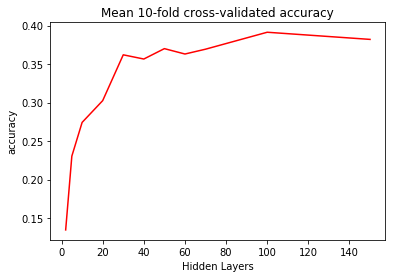

In [69]:
layers = [2,5,10,20,30,40,50,60,70,80,100,150]
results = []
for l in layers:
    clf = MLPClassifier(solver='lbfgs', alpha=1,hidden_layer_sizes=(l,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=10, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(layers, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layers")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3325206061746257
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.33644576719576713
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.31916666666666665


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.34471625203034156
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3400396825396825
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.33305555555555555


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.35913100102278456
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.35445634920634916
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3516666666666667


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3772910645340202
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.38155291005291003
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3686111111111111


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3914213868866148
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3954669312169312
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3844444444444444


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.9271949134728097
Test Set -- Mean Accuracy 0.39460630068831326
Training Set -- Mean Precision 0.9383588283118895
Test Set -- Mean Precision 0.37518915343915343
Training Set -- Mean Recall 0.9228149908167541
Test Set -- Mean Recall 0.3797222222222222


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.31714387549952516
Test Set -- Mean Accuracy 0.2729699541295774
Training Set -- Mean Precision 0.23558295114904187
Test Set -- Mean Precision 0.16552013053900924
Training Set -- Mean Recall 0.28154071920800505
Test Set -- Mean Recall 0.24222222222222226


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


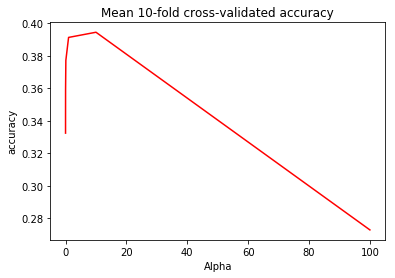

In [73]:
alphas = [0.0001,0.001,0.01,0.1,1,10,100]
results = []
for a in alphas:
    clf = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(100,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=10, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(alphas, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Alpha")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

### Cars

In [48]:
#bov = BOV(no_clusters=100)
#bov.start("images\\train\\", "images\\test\\")
#bov.start("../../../ex3/CarData/TrainImages/", "../../../ex3/CarData/TestImages/")
#bov.start("../../../ex3/FIDS30/train/", "../../../ex3/FIDS30/test/")